# Phase Retrieval Algorithms


## What is phase retrieval?

Consider a vector $x$ in some Hilbert space $H$.
Intensity measurements are obtained by taking the positive inner product with other vectors in $H$.
Using only these measurements, our goals is to recover $x$.

### Can we use a basis?

$
\def\R{\mathbb{R}}
\def\C{\mathbb{C}}
\def\mqty#1{\begin{bmatrix}#1\end{bmatrix}}
\def\ipt#1{\left\langle #1 \right\rangle}
\def\Ipt#1{\left|\ipt{#1}\right|}
$
Let $x = \mqty{-1\\1} \in \R^2$.

Using basis vectors $e_1 = \mqty{1\\0}$ and $e_2 = \mqty{0\\1}$ we obtain measurements
$$
b_1 = \Ipt{x, e_2} = 1
\quad\text{and}\quad
b_2 = \Ipt{x, e_2} = 1.
$$
Since $\mqty{1\\1}$, $\mqty{1\\-1}$, and $\mqty{-1\\-1}$ also yield these measurements, there is no way to uniquely determine $x$ from $\{b_1, b_2\}$.


### Can we use frames?
[Desmos Example](https://www.desmos.com/calculator/4et1xzuub0)

Using the Mercedes Benz frame
\begin{align*}
m_1 &= \mqty{0\\1}, &
m_2 &= \frac{1}{2} \mqty{-\sqrt{3}\;\\-1}, &
m_3 &= \frac{1}{2} \mqty{\;\sqrt{3}\;\\-1},
\end{align*}
we obtain measurements
\begin{align*}
b_1 &= \Ipt{x, m_1} = 1, &
b_2 &= \Ipt{x, m_2} = \frac{-1 + \sqrt{3}}{2}, &
b_3 &= \Ipt{x, m_3} = \frac{1 + \sqrt{3}}{2}.
\end{align*}

If $x_1 = \mqty{1\\1}, x_2 = \mqty{1\\-1}, x_3 = \mqty{-1\\-1}$, then
\begin{align*}
\Ipt{x_1, m_1} &= 1, &
\Ipt{x_1, m_2} &= \frac{1 + \sqrt{3}}{2}, &
\Ipt{x_1, m_3} &= \frac{-1 + \sqrt{3}}{2}, \\[2em]
\Ipt{x_2, m_1} &= 1, &
\Ipt{x_2, m_2} &= \frac{-1 + \sqrt{3}}{2}, &
\Ipt{x_2, m_3} &= \frac{1 + \sqrt{3}}{2}, \\[2em]
\Ipt{x_3, m_1} &= 1, &
\Ipt{x_3, m_2} &= \frac{1 + \sqrt{3}}{2}, &
\Ipt{x_3, m_3} &= \frac{-1 + \sqrt{3}}{2}.
\end{align*}
Using this frame, it seems that we have narrowed down the possibilities to $\pm x$.
For many situations, this is good enough.

### Questions
- Will this frame recover any $x \in \R^2$ up to sign?
- How do we use a frame to reconstruct $x$ without guessing?
- How many frame vectors are needed?

### Coherent diffraction imaging

In coherent diffraction imaging (CDI), we are trying to take a picture of a nano-sized structure.
To do this, we apply a coherent beam of X-rays to a sample and measure the intensity of electrons scattering as a diffraction pattern.
A diffraction pattern is essentially the magnitude of the Fourier transform of our sample.
So, if we can retrieve the phase information, then we can take the inverse transform to get a picture of our sample.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, show
from skimage.color import rgb2gray
from skimage.data import astronaut

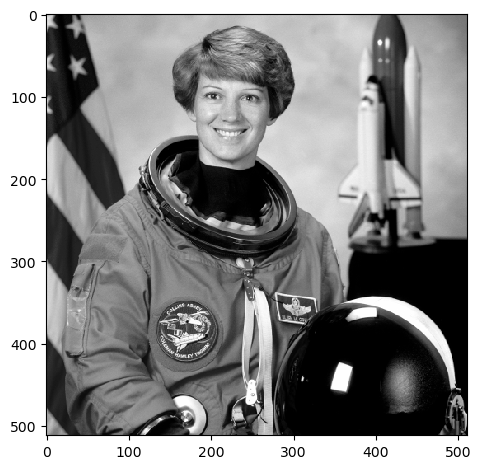

In [10]:
source = rgb2gray(astronaut())
imshow(source)
show()

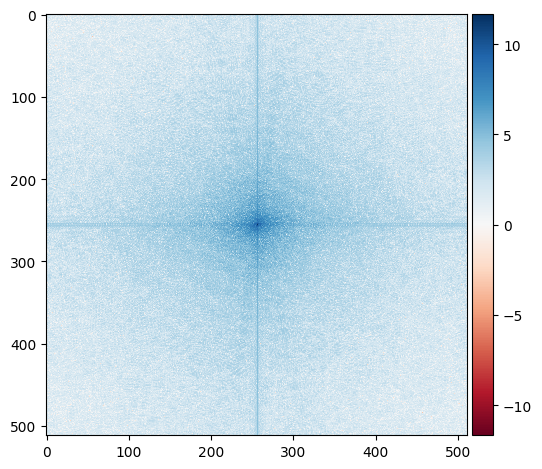

In [3]:
target = np.fft.fft2(source)
diffraction = np.abs(target)
imshow(np.log(np.fft.fftshift(diffraction)))
show()

### Discrete Fourier tranform

For a function $f$ on the interval $[0,1]$, the Fourier transform is given by
$$
F(\xi) = \int_{0}^{1} f(t) e^{-i 2\pi t \xi} \;\mathrm{d}t.
$$
Discretize $0 = t_0 < t_1 < \dots < t_N < t_{N+1} = 1$ to get $f_k = f(t_k)$ for $k = 0, \dots, N+1$.
Then

## References

- Casazza, P. G., Ghoreishi, D., Jose, S., & Tremain, J. C. (2017). *Norm retrieval and phase retrieval by projections*. Axioms, 6(1), 6. https://doi.org/10.3390/axioms6010006
- Balan, R., Bodmann, B. G., Casazza, P. G., & Edidin, D. (2007, September). *Fast algorithms for signal reconstruction without phase*. In Wavelets XII (Vol. 6701, pp. 591-599). SPIE. https://doi.org/10.1117/12.731117
- Balan, R., Casazza, P., & Edidin, D. (2004). *On signal reconstruction without noisy phase*. arXiv preprint math/0412411. https://doi.org/10.48550/arXiv.math/0412411
- Bahmanpour, S., Cahill, J., Casazza, P. G., Jasper, J., & Woodland, L. M. (2014). *Phase retrieval and norm retrieval*. arXiv preprint arXiv:1409.8266. https://doi.org/10.48550/arXiv.1409.8266
- Bandeira, A. S., Cahill, J., Mixon, D. G., & Nelson, A. A. (2014). *Saving phase: Injectivity and stability for phase retrieval*. Applied and Computational Harmonic Analysis, 37(1), 106-125. https://doi.org/10.1016/j.acha.2013.10.002
- Morgenshtern, V. I., & Bölcskei, H. (2017). *A short course on frame theory*. In Mathematical foundations for signal processing, communications, and networking (pp. 737-789). CRC Press.

- Jaganathan, K., Eldar, Y. C., & Hassibi, B. (2016). *Phase retrieval: An overview of recent developments*. Optical Compressive Imaging, 279-312. https://doi.org/10.48550/arXiv.1510.07713
- Donatelli, Jeffrey, and Joe Chen. *Phase Retrieval for Coherent Diffractive Imaging: Theory and Algorithm*. YouTube, BioXFEL, 2 Nov. 2021, youtu.be/8rJYhRMVvQw?si=zbVD6Ko0f55wVsX4. 